In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import random
from scipy.stats import norm
import numpy.random as rnd
import csv

\\(dXt = −θXt+σdWt\\) with \\(X(0) = 10\\),
\\(θ = 5\\), and \\(σ = 3.5\\),

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


max error of Euler =  [4.13537232]
max error of Milstein_1 =  [4.13537232]
max error of Milstein_2 =  [4.12128046]
max error of Predictor_corrector =  [4.13537232]
max error of KPS =  [4.12279548]


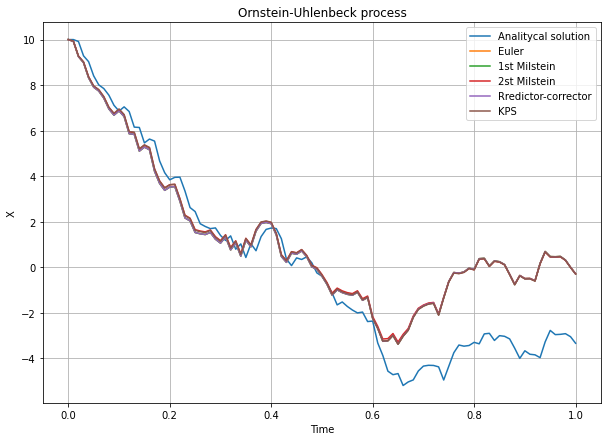

In [ ]:
theta = 5
sigma = 3.5
N = 100
t =[i/N for i in range(N+1)]

def max_err(name, X):
  max_error = 0
  for i in range(0, N+1):
    temp = abs(X[i]-X1[i])
    if (temp > max_error):
      max_error = temp
  print("max error of " + name + " = ", max_error)

def BM():
  W = []
  T = 1
  W.append(0)
  Delta = T / N
  X = [i/N for i in range (N+1)]
  for i in range(1, len(X)):
    W.append(W[i - 1] + np.random.normal (0, 1, 1) * np.sqrt(Delta))
  return W

def real_res():
  ito_sum = [np.exp(-theta * (t[i] - t[i-1])) * (W[i] - W[i-1]) for i in range(1,N)]
  X1 = [x * np.exp(-theta * t[i]) + sigma * sum(ito_sum[0:i]) for i in range(N)]
  X1 = [x] + X1
  plt.plot(t , X1)
  return X1

def Euler():
  X = []
  X.append(x)
  for i in range(1, N+1):
    b = (-theta*X[i-1])
    sig = sigma
    X.append(X[i-1] + b * (t[i] - t[i-1]) + sig * (W[i] - W[i-1]))
  plt.plot(t , X)
  max_err("Euler", X)

def Milstein_1():
  X = []
  X.append(x)
  for i in range(1, N+1):
    b = (-theta*X[i-1])
    sig = sigma
    sig_x = 0
    X.append(X[i-1] + b * (t[i] - t[i-1]) + sig * (W[i] - W[i-1]) \
    + 0.5*sig*sig_x*((W[i] - W[i-1])**2 - (t[i] - t[i-1])))
  plt.plot(t , X)
  max_err("Milstein_1", X)

def Rredictor_corrector():
  X = []
  X.append(x)
  alpha = random.uniform(0, 1)
  eta = random.uniform(0, 1)
  for i in range(1, N+1):
    b = (-theta*X[i-1])
    sig = sigma
    sig_x = 0
    delta_t = t[i] - t[i-1]
    delta_W = W[i] - W[i-1]
    #Z = np.random.normal (0, 1, 1)
    Z = delta_W/np.sqrt(delta_t)
    Y = X[i-1] + b*delta_t + sig*np.sqrt(delta_t)*Z
    by = -theta* Y
    b_ = b - eta * sig*sig_x
    by_ = b - eta * (-theta) * Y * sig_x
    sigy = sigma
    X.append(X[i-1] + (alpha * by_ +(1-alpha)*b_)*delta_t + (eta*sigy + (1-eta)*sig)*delta_W)#np.sqrt(delta_t)*Z)
  plt.plot(t, X)
  max_err("Predictor_corrector", X)


def Milstein_2():
  X = []
  X.append(x)
  for i in range(1, N+1):
    b = (-theta*X[i-1])
    b_x = -theta
    b_xx = 0
    sig = sigma
    sig_x = 0
    sig_xx = 0
    delta_t = t[i] - t[i-1]
    delta_W = W[i] - W[i-1]
    Z = delta_W/np.sqrt(delta_t)
    X.append(X[i-1] + (b-0.5*sig*sig_x)*delta_t + sig*Z*np.sqrt(delta_t)+0.5*sig*sig_x*delta_t*(Z**2) \
            +delta_t**1.5*(0.5*b*sig_x + 0.5*b_x*sig + 0.25*sig**2*sig_xx)*Z \
            + delta_t**2*(0.5*b*b_x + 0.25*b_xx*sig**2))
  plt.plot(t , X)
  max_err("Milstein_2", X)

def KPS():
  X = []
  X.append(x)
  U = []
  delta_t = t[1] - t[0]
  for i in range(0, N+1):
     U.append(np.random.normal (0, 1/3*delta_t ** 3, 1))
  for i in range(1, N+1):
    b = (-theta*X[i-1])
    b_x = -theta
    b_xx = 0
    sig = sigma
    sig_x = 0
    sig_xx = 0
    sigsig_x_x = 0
    delta_t = t[i] - t[i-1]
    delta_W = W[i] - W[i-1]
    delta_U = U[i] - U[i-1]
    X.append(X[i-1] + b*delta_t + sig*delta_W + 0.5*sig*sig_x*(delta_W ** 2 - delta_t) \
             + sig * b_x * delta_U + 0.5 * (b*b_x+0.5*sig**2*b_xx)* delta_t ** 2 \
             +(b * sig_x + 0.5*sig**2*sig_xx)*(delta_W*delta_t - delta_U) \
             + 0.5 *sig * sigsig_x_x *(1/3*delta_W**2-delta_t)*delta_W)
  plt.plot(t , X)
  max_err("KPS", X)


x = 10
W = BM()

plt.figure(figsize = (10, 7))
plt.grid()
plt.title('Ornstein-Uhlenbeck process')
X1 = real_res()
Euler()
Milstein_1()
Milstein_2()
Rredictor_corrector()
KPS()
plt.legend (['Analitycal solution', 'Euler', '1st Milstein', '2st Milstein', 'Rredictor-corrector', 'KPS'], loc = 'best')
plt.xlabel("Time")
plt.ylabel("X")
plt.show()

max error of Euler =  [0.12634042]
max error of Milstein_1 =  [0.1266738]
max error of Milstein_2 =  [0.12654413]
max error of Predictor_corrector =  [0.12658507]
max error of KPS =  [0.12667035]


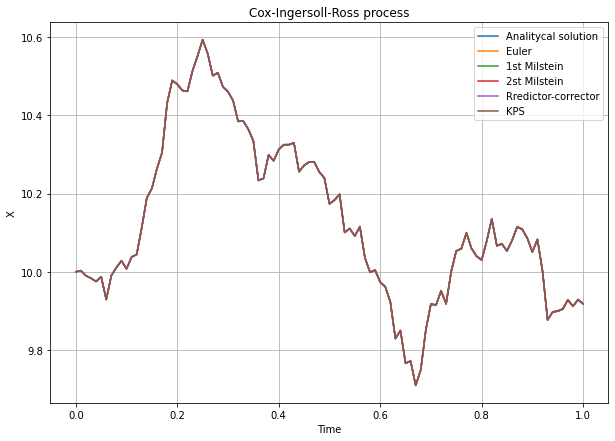

In [ ]:
theta = [2, 0.2, 0.15]
theta1 = 5
sigma = 3.5
beta = 1.1
N = 100
t =[i/N for i in range(N+1)]

def CIR2(X, theta, beta, sigma, dt):
  DX = theta * (beta - X) * dt + sigma * np.sqrt(X) * np.random.normal(0, np.sqrt(dt))
  return DX

def BM():
  W = []
  T = 1
  W.append(0)
  Delta = T / N
  X = [i/N for i in range (N+1)]
  for i in range(1, len(X)):
    W.append(W[i - 1] + np.random.normal (0, 1, 1) * np.sqrt(Delta))
  return W

def real_res():
  X = np.zeros(N)
  X[0] = 10
  for i in range(1, len(X)):
    X[i] = X[i - 1] + CIR2(X[i - 1], theta1, beta, sigma, 1 / N)
  plt.plot(t , X)

def Euler():
  X = []
  X.append(x)
  for i in range(1, N+1):
    b = (theta[0] - theta[1]*X[i-1])
    sig = theta[2] * np.sqrt(X[i-1])
    X.append(X[i-1] + b * (t[i] - t[i-1]) + sig * (W[i] - W[i-1]))
  plt.plot(t , X)
  max_err("Euler", X)

def Milstein_1():
  X = []
  X.append(x)
  for i in range(1, N+1):
    b = (theta[0] - theta[1]*X[i-1])
    sig = theta[2] * np.sqrt(X[i-1])
    sig_x = theta[2] * 0.5 * 1/np.sqrt(X[i-1])
    X.append(X[i-1] + b * (t[i] - t[i-1]) + sig * (W[i] - W[i-1]) \
    + 0.5*sig*sig_x*((W[i] - W[i-1])**2 - (t[i] - t[i-1])))
  plt.plot(t , X)
  max_err("Milstein_1", X)

def Rredictor_corrector():
  X = []
  X.append(x)
  alpha = random.uniform(0, 1)
  eta = random.uniform(0, 1)
  for i in range(1, N+1):
    b = (theta[0] - theta[1]*X[i-1])
    sig = theta[2] * np.sqrt(X[i-1])
    sig_x = theta[2] * 0.5 * 1/np.sqrt(X[i-1])
    delta_t = t[i] - t[i-1]
    delta_W = W[i] - W[i-1]
    #Z = np.random.normal (0, 1, 1)
    Z = delta_W/np.sqrt(delta_t)
    Y = X[i-1] + b*delta_t + sig*np.sqrt(delta_t)*Z
    by = (theta[0] - theta[1] * Y)
    b_ = b - eta * sig*sig_x
    by_ = b - eta * by * sig_x
    sigy = theta[2] * np.sqrt(Y)
    X.append(X[i-1] + (alpha * by_ +(1-alpha)*b_)*delta_t + (eta*sigy + (1-eta)*sig)*delta_W)#np.sqrt(delta_t)*Z)
  plt.plot(t, X)
  max_err("Predictor_corrector", X)

def Milstein_2():
  X = []
  X.append(x)
  for i in range(1, N+1):
    b = (theta[0] - theta[1]*X[i-1])
    b_x = -theta[1]
    b_xx = 0
    sig = theta[2] * np.sqrt(X[i-1])
    sig_x = theta[2] * 0.5 * 1/np.sqrt(X[i-1])
    sig_xx = -0.25*theta[2]*x**(-3/2)
    delta_t = t[i] - t[i-1]
    delta_W = W[i] - W[i-1]
    Z = delta_W/np.sqrt(delta_t)
    X.append(X[i-1] + (b-0.5*sig*sig_x)*delta_t + sig*Z*np.sqrt(delta_t)+0.5*sig*sig_x*delta_t*(Z**2) \
            +delta_t**1.5*(0.5*b*sig_x + 0.5*b_x*sig + 0.25*sig**2*sig_xx)*Z \
            + delta_t**2*(0.5*b*b_x + 0.25*b_xx*sig**2))
  plt.plot(t , X)
  max_err("Milstein_2", X)

def KPS():
  X = []
  X.append(x)
  U = []
  delta_t = t[1] - t[0]
  for i in range(0, N+1):
     U.append(np.random.normal (0, 1/3*delta_t ** 3, 1))
  for i in range(1, N+1):
    b = (theta[0] - theta[1]*X[i-1])
    b_x = -theta[1]
    b_xx = 0
    sig = theta[2] * np.sqrt(X[i-1])
    sig_x = theta[2] * 0.5 * 1/np.sqrt(X[i-1])
    sig_xx = -0.25*theta[2]*x**(-3/2)
    sigsig_x_x = 0.25*theta[2]**2*x**(-3)
    delta_t = t[i] - t[i-1]
    delta_W = W[i] - W[i-1]
    delta_U = U[i] - U[i-1]
    X.append(X[i-1] + b*delta_t + sig*delta_W + 0.5*sig*sig_x*(delta_W ** 2 - delta_t) \
             + sig * b_x * delta_U + 0.5 * (b*b_x+0.5*sig**2*b_xx)* delta_t ** 2 \
             +(b * sig_x + 0.5*sig**2*sig_xx)*(delta_W*delta_t - delta_U) \
             + 0.5 *sig * sigsig_x_x *(1/3*delta_W**2-delta_t)*delta_W)
  plt.plot(t , X)
  max_err("KPS", X)


x = 10
W = BM()

plt.figure(figsize = (10, 7))
plt.grid()
plt.title('Cox-Ingersoll-Ross process')
#real_res()
Euler()
Milstein_1()
Milstein_2()
Rredictor_corrector()
KPS()
plt.legend (['Analitycal solution', 'Euler', '1st Milstein', '2st Milstein', 'Rredictor-corrector', 'KPS'], loc = 'best')
plt.xlabel("Time")
plt.ylabel("X")
plt.show()

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


max error of Euler =  [0.13923809]
max error of Milstein_1 =  [0.10237205]
max error of Milstein_2 =  [0.00168672]
max error of Predictor_corrector =  [0.76624467]
max error of KPS =  [0.00075679]


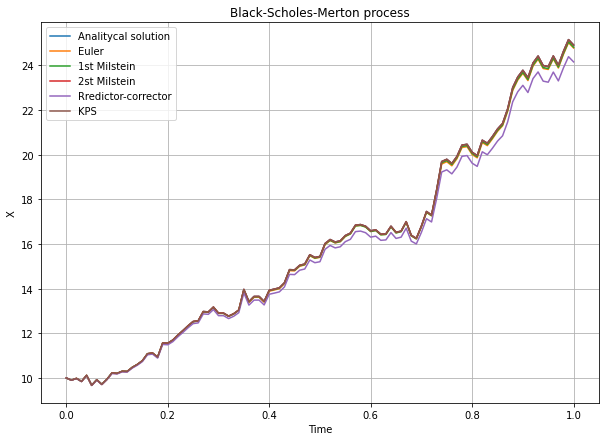

In [ ]:
theta = [1, 0.2]
N = 100
t =[i/N for i in range(N+1)]

def BM():
  W = []
  T = 1
  W.append(0)
  Delta = T / N
  X = [i/N for i in range (N+1)]
  for i in range(1, len(X)):
    W.append(W[i - 1] + np.random.normal (0, 1, 1) * np.sqrt(Delta))
  return W

def real_res():
  X = [x*np.exp((theta[0]-0.5*theta[1]**2)*t[i] + theta[1]*W[i]) for i in range(1, N+1)]
  X = [x] + X
  plt.plot(t , X)
  return X

def Euler():
  X = []
  X.append(x)
  for i in range(1, N+1):
    X.append(X[i-1] + theta[0]*X[i-1] * (t[i] - t[i-1]) + theta[1]*X[i-1] * (W[i] - W[i-1]))
  plt.plot(t , X)
  max_err("Euler", X)

def Milstein_1():
  X = []
  X.append(x)
  for i in range(1, N+1):
    X.append(X[i-1] + theta[0]*X[i-1] * (t[i] - t[i-1]) + theta[1]*X[i-1] * (W[i] - W[i-1]) \
    + 0.5*(theta[1]*X[i-1])*theta[1]*((W[i] - W[i-1])**2 - (t[i] - t[i-1])))
  plt.plot(t , X)
  max_err("Milstein_1", X)

def Rredictor_corrector():
  X = []
  X.append(x)
  alpha = random.uniform(0, 1)
  eta = random.uniform(0, 1)
  for i in range(1, N+1):
    b = theta[0] * X[i-1]
    sig = theta[1] * X[i-1]
    sig_x = theta[1]
    delta_t = t[i] - t[i-1]
    delta_W = W[i] - W[i-1]
    #Z = np.random.normal (0, 1, 1)
    Y = X[i-1] + b*delta_t + sig*np.sqrt(delta_t)*W[i]/np.sqrt(delta_t)#Z
    by = theta[0] * Y
    b_ = b - eta * sig*sig_x
    by_ = b - eta * theta[0] * Y * sig_x
    sigy = theta[1] * Y
    X.append(X[i-1] + (alpha * by_ +(1-alpha)*b_)*delta_t + (eta*sigy + (1-eta)*sig)*delta_W)#np.sqrt(delta_t)*Z)
  plt.plot(t, X)
  max_err("Predictor_corrector", X)

def Milstein_2():
  X = []
  X.append(x)
  for i in range(1, N+1):
    b = theta[0] * X[i-1]
    b_x = theta[0]
    b_xx = 0
    sig = theta[1] * X[i-1]
    sig_x = theta[1]
    sig_xx = 0
    delta_t = t[i] - t[i-1]
    delta_W = W[i] - W[i-1]
    Z = delta_W/np.sqrt(delta_t)
    # X.append(X[i-1] + (b-0.5*sig*sig_x)*delta_t + sig*Z*np.sqrt(delta_t)+0.5*sig*sig_x*delta_t*(Z**2) \
    #          +delta_t**1.5*(0.5*b*sig_x + 0.5*b_x*sig + 0.25*sig**2*sig_xx)*Z \
    #          + delta_t**2*(0.5*b*b_x + 0.25*b_xx*sig**2))
    X.append(X[i-1] + (b-0.5*sig*sig_x)*delta_t + sig*Z*np.sqrt(delta_t)+0.5*sig*sig_x*delta_t*(Z**2) \
            +delta_t**1.5*(0.5*b*sig_x + 0.5*b_x*sig + 0.25*sig**2*sig_xx)*Z \
            + delta_t**2*(0.5*b*b_x + 0.25*b_xx*sig**2))
  plt.plot(t , X)
  max_err("Milstein_2", X)

def KPS():
  X = []
  X.append(x)
  U = []
  delta_t = t[1] - t[0]
  for i in range(0, N+1):
     U.append(np.random.normal (0, 1/3*delta_t ** 3, 1))
  for i in range(1, N+1):
    b = theta[0] * X[i-1]
    b_x = theta[0]
    b_xx = 0
    sig = theta[1] * X[i-1]
    sig_x = theta[1]
    sig_xx = 0
    sigsig_x_x = theta[1] ** 2
    delta_t = t[i] - t[i-1]
    delta_W = W[i] - W[i-1]
    delta_U = U[i] - U[i-1]
    X.append(X[i-1] + b*delta_t + sig*delta_W + 0.5*sig*sig_x*(delta_W ** 2 - delta_t) \
             + sig * b_x * delta_U + 0.5 * (b*b_x+0.5*sig**2*b_xx)* delta_t ** 2 \
             +(b * sig_x + 0.5*sig**2*sig_xx)*(delta_W*delta_t - delta_U) \
             + 0.5 *sig * sigsig_x_x *(1/3*delta_W**2-delta_t)*delta_W)
  plt.plot(t , X)
  max_err("KPS", X)


x = 10
W = BM()

plt.figure(figsize = (10, 7))
plt.grid()
plt.title('Black-Scholes-Merton process')
X1 = real_res()
Euler()
Milstein_1()
Milstein_2()
Rredictor_corrector()
KPS()
plt.legend (['Analitycal solution', 'Euler', '1st Milstein', '2st Milstein', 'Rredictor-corrector', 'KPS'], loc = 'best')
plt.xlabel("Time")
plt.ylabel("X")
plt.show()

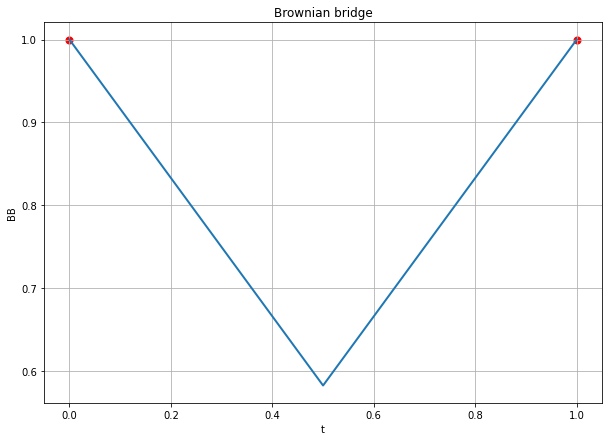

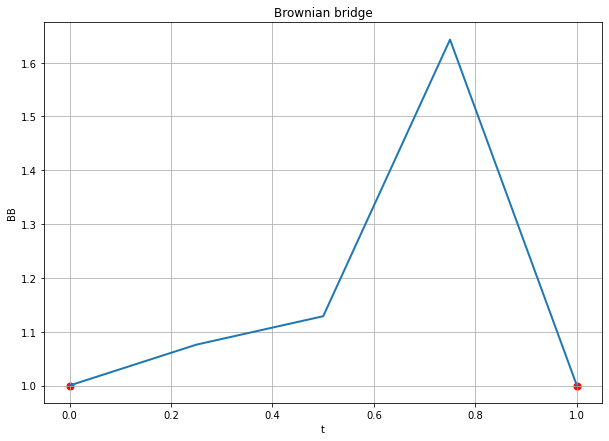

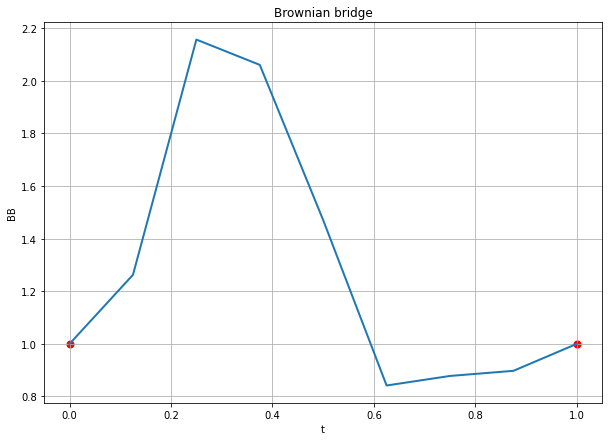

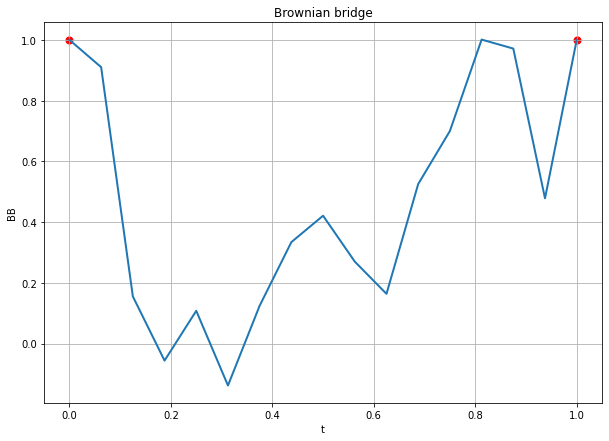

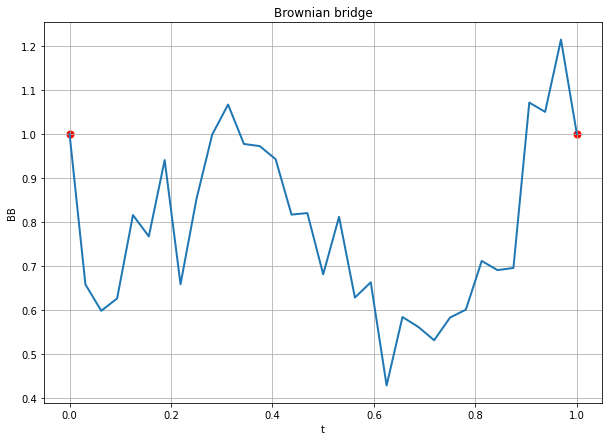

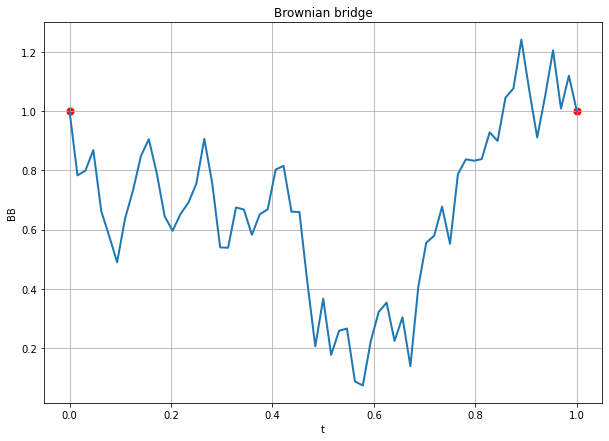

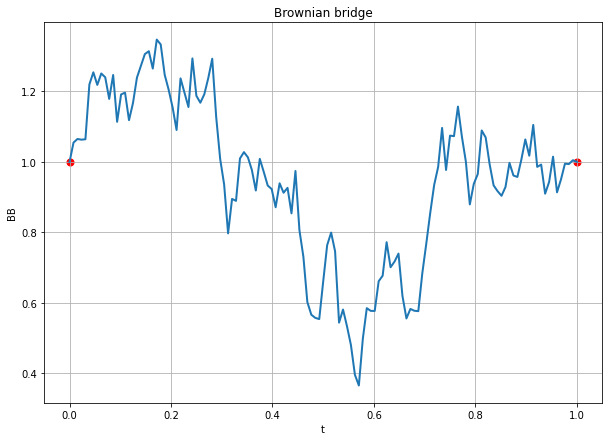

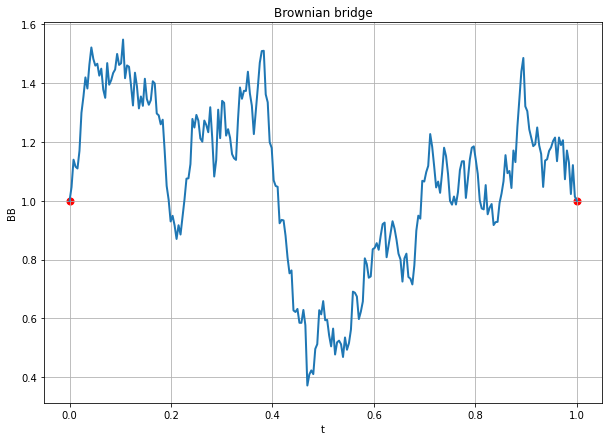

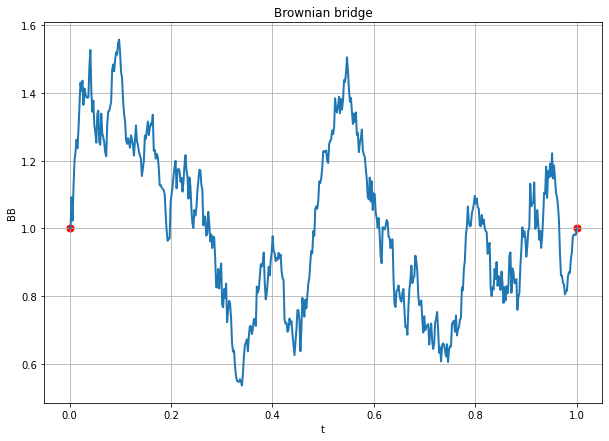

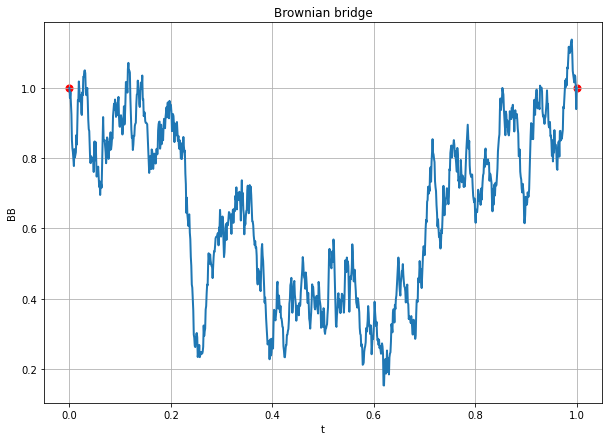

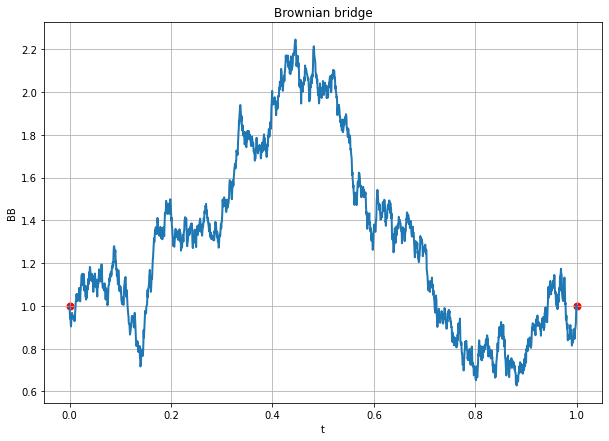

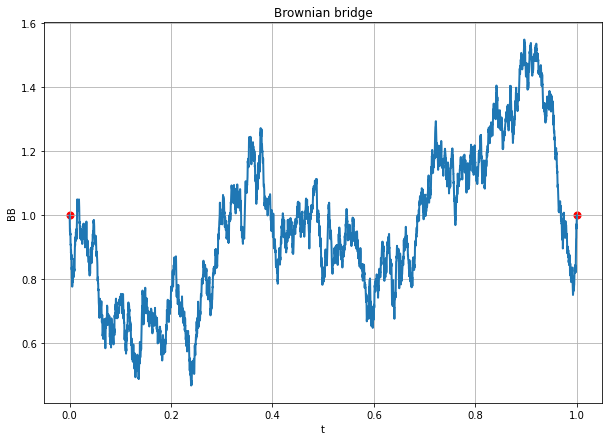

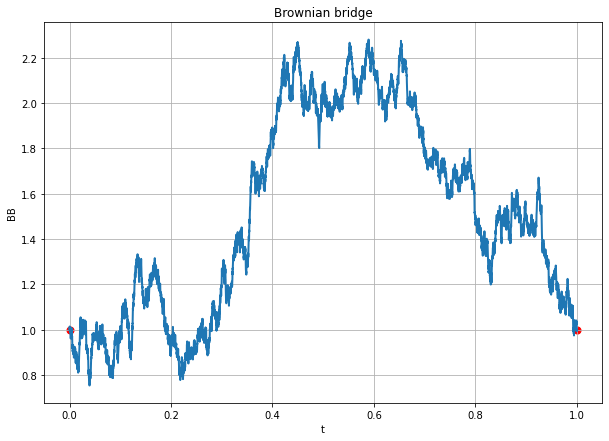

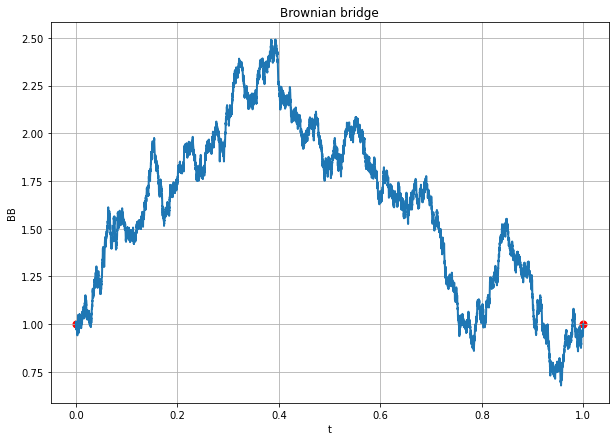

14


In [ ]:
def BB(x, y, W, t, N):
  return([x + W[i] - t[i]/T * (W[N] - y + x) for i in range(N + 1)])

def BM():
  W = []
  T = 1
  W.append(0)
  Delta = T / N
  X = [i/N for i in range (N+1)]
  for i in range(1, len(X)):
    W.append(W[i - 1] + np.random.normal (0, 1, 1) * np.sqrt(Delta))
  return W

T = 1
N = 2
x = 1
y = 1
W = []


for i in range(1,15):
  N = 2 ** i
  t =[i/N for i in range(N+1)]
  W_i = BM()
  W.append(W_i)
  bb = BB(x, y, W_i, t, N)
  plt.figure (figsize =(10, 7) )
  plt.grid()
  plt.plot(t, bb , linewidth =2.0)
  plt.scatter(t[0], x, color = "red", s = 50)
  plt.scatter(t[len(t) - 1], y, color = "red", s = 50)
  plt.title('Brownian bridge')
  plt.xlabel("t")
  plt.ylabel("BB")
  plt.show()
print(len(W))


<ipython-input-8-48b7d35a7ae8>:18: RuntimeWarning: overflow encountered in multiply
  E.append(E[j-1]*(1+theta[0]+dt*theta[1]*Z))


[0.3855070866055077, -0.18022574736396416, 0.12770754560775063, 0.3121905330664799, -0.0809521201689217, -0.06636005026727429, 0.001971425551480853, -0.006101672258538831, 0.010597674182061914, 0.030681653719580274, 0.00720082357303394, 0.006618413656494049, -0.0018943761290273644, 0.005296983290353399]


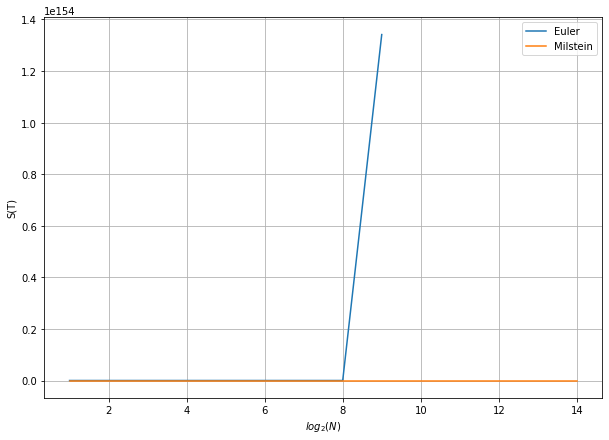

In [ ]:
X0 = 1
theta = [1, 0.5]
euler = []
milstein = []
x = []

for i in range(0,14):
  #print(i)
  n = len(W[i])
  dt = 1/n
  delta = np.sqrt(dt)
  E = []
  E.append(X0)
  M = []
  M.append(X0)
  for j in range(1, n):
    Z = W[i][j] - W[i][j-1]
    E.append(E[j-1]*(1+theta[0]+dt*theta[1]*Z))
    M.append(M[j-1]*(1+theta[0] - 0.5*theta[1]**2) * dt +theta[1] *Z + 0.5*theta[1]**2*Z**2)
  euler.append(E[n-1][0])
  milstein.append(M[n-1][0])
  x.append(i+1)

plt.figure (figsize =(10, 7) )
plt.grid()
print(milstein)
plt.plot(x, euler)
plt.plot(x, milstein)
plt.legend (['Euler', 'Milstein'], loc = 'best')
plt.xlabel(r"$log_2(N)$")
plt.ylabel("S(T)")
plt.show()

In [ ]:
def BB(x, y, W, t, N):
  return([x + W[i] - t[i]/T * (W[N] - y + x) for i in range(N + 1)])

def BM():
  W = []
  T = 1
  W.append(0)
  Delta = T / N
  X = [i/N for i in range (N+1)]
  for i in range(1, len(X)):
    W.append(W[i - 1] + np.random.normal (0, 1, 1) * np.sqrt(Delta))
  return W

T = 1
N = 2
x = 1
y = 1
W = []
BB_total = []
BB_total.append([1, 1])


for i in range(1,15):
  N = 2 ** i
  t =[i/N for i in range(N+1)]
  W = BM()
  bb = []
  for j in range(0, N, 2):
    bb += BB(BB_total[i-1][int(j/2)], BB_total[i-1][int(j/2) + 1], W, t[j:j+2], 2)
  BB_total.append(bb)
  plt.figure (figsize =(10, 7) )
  plt.grid()
  plt.plot(t, bb , linewidth =2.0)
  plt.scatter(t[0], x, color = "red", s = 50)
  plt.scatter(t[len(t) - 1], y, color = "red", s = 50)
  plt.title('Brownian bridge')
  plt.xlabel("t")
  plt.ylabel("BB")
  plt.show()
print(len(W))


In [ ]:
def BB(x, y, W, t, N):
  return([x + W[i] - t[i]/T * (W[N] - y + x) for i in range(N + 1)])

def BM(T, N):
  W = []
  T = 1
  W.append(0)
  Delta = T / N
  X = [i/N for i in range (N+1)]
  for i in range(1, len(X)):
    W.append(W[i - 1] + np.random.normal (0, 1, 1) * np.sqrt(Delta))
  return W

W = []
B = []
N = 2
T = 1
W = BM(T, N)
t =[i/N for i in range(N+1)]
B.append(BB(1, 1, W, t, N))
plt.figure (figsize =(10, 7) )
plt.grid()
plt.plot(t, B[0], linewidth =2.0)
plt.scatter(t[0], 1, color = "red", s = 50)
plt.scatter(t[len(t) - 1], 1, color = "red", s = 50)
plt.title('Brownian bridge')
plt.xlabel("t")
plt.ylabel("BB")
plt.show()
# T = []
# T.append(t)
min_w = min(B[0])
max_w = max(B[0])
t =[i/N for i in range(N+1)]

for i in range(0, 13):
  n = len(B[i])
  w = B[i]
  temp = w[0]
  for j in range(0, n-1):
    t =[t[j], (t[j]+t[j+1])/2, t[j+1]]
    temp_BB = BB(w[j], w[j+1], W, t, N)
    temp = temp + temp_BB[1:3]
  B.append(temp)
  min_temp = min(temp)
  max_temp = max(temp)
  if min_temp < min_w:
    min_w = min_temp
    print (min_temp)
  if max_temp > max_w:
    max_w = max_temp
min_w = min_w - 0.5
max_w = max_w + 0.5
for i in range(13):
  t =[i/len(B[i]) for i in range(len(B[i])+1)]
  plt.plot(B[i])
  plt.show()


In [ ]:
# GBM
def Mult_GBM(mu, sigma, t, W):
    return np.exp((mu - (sigma**2)/2)*t + sigma * W)

# For the Milstein scheme
# Geomtric brownian Motion
def M_GBM(S, mu, sigma, dt, dW):
    dS = mu * S * dt + sigma * S * dW + (sigma**2) * S * ((dW**2) - dt) / 2
    return dS

# For the Euler-Maruyama approximation
# Geometric Brownian Motion process
def GBM(S, mu, sigma, dt, dW):
    dS = mu * S * dt + sigma * S * dW
    return dS

def Wiener_proc(N, T):
    W = np.zeros(N)  
    delta = T / N
    sqrt_delta = np.sqrt(delta)    
    for i in range (1, N):
        W[i] += W[i-1] + rnd.normal(0, sqrt_delta)
    return W



N = 100
T = 1
time_line, dt = np.linspace(0, T, N, retstep=True)
mu = 1
sigma = 0.2
alpha = 0.33
eta   = 0.25

# Generate common Wiener proces:
W  = Wiener_proc(N, T)
dW = 0

S_gbm, EUS_gbm, MS_gbm = np.zeros(N), np.zeros(N), np.zeros(N)
errEU, errM = np.zeros(N), np.zeros(N)
S_gbm[0], EUS_gbm[0], MS_gbm[0] = 10, 10, 10

for i in range(1, N):
    dW = W[i] - W[i-1]
    S_gbm[i]   = S_gbm[0] * Mult_GBM(mu, sigma, time_line[i], W[i-1])
    EUS_gbm[i] = EUS_gbm[i-1] + GBM(S_gbm[i-1], 1, 0.2, dt, dW)
    MS_gbm[i]  = MS_gbm[i-1] + M_GBM(MS_gbm[i-1], 1, 0.2, dt, dW)   
    errEU[i] = abs(S_gbm[i] - EUS_gbm[i])
    errM[i]  = abs(S_gbm[i] - MS_gbm[i])

    
# Plot figure
plt.figure ( figsize =(10, 7) )
plt.grid ()

plt.plot (time_line, S_gbm, linewidth =1.0, label="GBM")
plt.plot (time_line, EUS_gbm, linewidth =1.0, label="EU GBM")
plt.plot (time_line, MS_gbm, linewidth =1.0, label="M GBM")

plt.title ("GBM processes on different schemes")
plt.xlabel ("t")
plt.ylabel ("W")
plt.legend()
plt.xlim(1*T/100, T)
plt.show ()


In [ ]:
def generater_OU(n, t, x, theta):
  Ex = theta[0]/theta[1] + (x - theta[0]/theta[1]) * np.exp(-theta[1]*t)
  Vx = theta[2] ** 2 * np.sqrt((1-np.exp(-2*theta[1]*t))/(2*theta[1]))
  return np.random.normal (Ex, np.sqrt(Vx), n)

def generater_BS(n, dt, x, theta):
  lmean = np.log(x) + (theta[0]-0.5*theta[1]**2)*dt
  lsd = np.sqrt(dt)*theta[1]
  return np.random.lognormal(lmean, lsd, n)

In [ ]:
ou = []
for t in range(0, 100):
  ou.append(generater_OU(1, t, 10, [2, 0.2, 0.15])[0])
with open("C:\\Users\\Ксения Лучкова\\OneDrive\\Документы\\Сириус\\Семестр 1\\Статистика случайных процессов\\2_3_a.csv", 'w', newline='') as csvfile:
  writer = csv.writer(csvfile, delimiter=' ', quotechar=',', quoting=csv.QUOTE_MINIMAL)
  writer.writerow(ou)



In [ ]:
bs = []
for t in range(0, 100):
  bs.append(generater_BS(1, 0.1, 10, [2, 0.2, 0.15])[0])
print(bs) 
with open("C:\\Users\\Ксения Лучкова\\OneDrive\\Документы\\Сириус\\Семестр 1\\Статистика случайных процессов\\2_3_b.csv", 'w', newline='') as csvfile:
  writer = csv.writer(csvfile, delimiter=' ', quotechar=',', quoting=csv.QUOTE_MINIMAL)
  writer.writerow(bs)

[12.784695100277437, 11.729363767966081, 12.290933793802603, 12.497296605524085, 12.78924232630312, 12.96621402007506, 12.719021317287185, 13.316211964991462, 11.522795065981446, 12.602750450814296, 12.190657923452896, 12.370606457794054, 12.876585844087858, 12.195474751526945, 12.7963605968209, 11.77429075880245, 12.38410152439191, 11.793517839248294, 12.369727972618042, 10.830298248877492, 12.157811926964385, 11.975444695023201, 12.764509238153567, 11.512142103731653, 11.897813231967628, 11.405098705945306, 11.13873240368922, 12.177309292231806, 10.21205241674129, 11.839549387589196, 11.418181344484076, 11.064808456650486, 12.046202043852952, 12.073987618786393, 11.993572107499496, 12.476278228317998, 11.203939532239861, 11.955386041261809, 12.622004740885155, 11.934776190991531, 11.141999296424418, 12.759925073293886, 12.125127656053957, 12.177083113082917, 12.995310183721962, 11.164174633572156, 10.842029898426619, 12.972334024559858, 13.408242335522356, 13.98182411905095, 12.86627

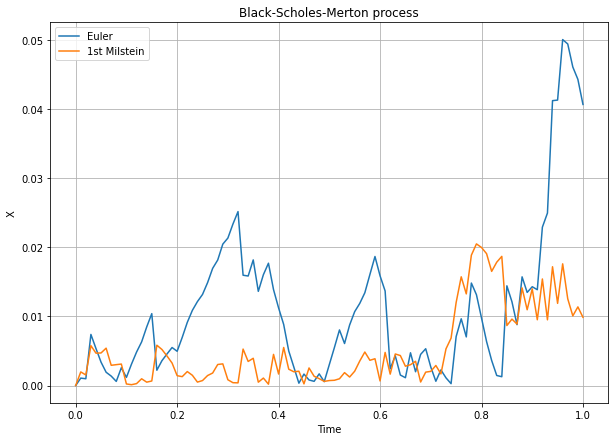

In [ ]:
theta = [1, 0.2]
N = 100
t =[i/N for i in range(N+1)]

def err(X):
  res = []
  max_error = 0
  for i in range(0, N+1):
    res.append(abs(X[i]-X1[i]))
  return(res)

def BM():
  W = []
  T = 1
  W.append(0)
  Delta = T / N
  X = [i/N for i in range (N+1)]
  for i in range(1, len(X)):
    W.append(W[i - 1] + np.random.normal (0, 1, 1) * np.sqrt(Delta))
  return W

def real_res():
  X = [x*np.exp((theta[0]-0.5*theta[1]**2)*t[i] + theta[1]*W[i]) for i in range(1, N+1)]
  X = [x] + X
  #plt.plot(t , X)
  return X

def Euler():
  X = []
  X.append(x)
  for i in range(1, N+1):
    X.append(X[i-1] + theta[0]*X[i-1] * (t[i] - t[i-1]) + theta[1]*X[i-1] * (W[i] - W[i-1]))
  #plt.plot(t , X)
  return X

def Milstein_1():
  X = []
  X.append(x)
  for i in range(1, N+1):
    X.append(X[i-1] + theta[0]*X[i-1] * (t[i] - t[i-1]) + theta[1]*X[i-1] * (W[i] - W[i-1]) \
    + 0.5*(theta[1]*X[i-1])*theta[1]*((W[i] - W[i-1])**2 - (t[i] - t[i-1])))
  #plt.plot(t , X)
  return X

x = 10
W = BM()

plt.figure(figsize = (10, 7))
plt.grid()
plt.title('Black-Scholes-Merton process')
X1 = real_res()
X2 = Euler()
X3 = Milstein_1()

plt.plot(t, err(X2))
plt.plot(t, err(X3))
plt.legend (['Euler', '1st Milstein'], loc = 'best')
plt.xlabel("Time")
plt.ylabel("X")
plt.show()

[2.7162082863882153, 1.1205648562428365, 0.42866564202892077, 0.10814314754047938, 0.04697582364784819, 0.12371665676754229, 0.16048635648827678, 0.177629901420157, 0.18154840579155818, 0.18083222768249443, 0.17600610112494566, 0.16931803176398397, 0.15873195446230184, 0.10176595062271764]


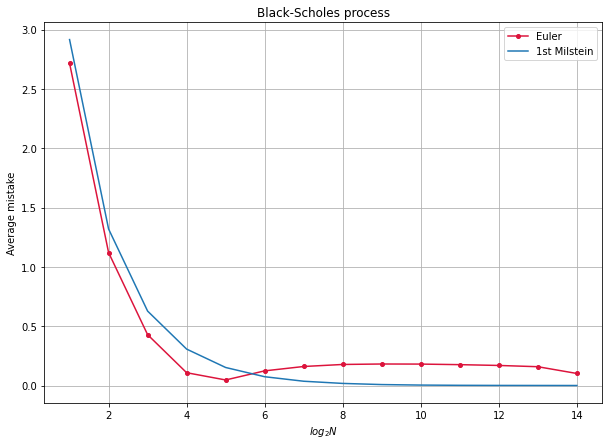

In [ ]:
theta = [1, 0.2]

def err(X):
  res = []
  max_error = 0
  for i in range(0, N+1):
    r  = abs(X[i]-X1[i])
    res.append(r)
  return(sum(res)/N)

def BM():
  W = []
  T = 1
  W.append(0)
  Delta = T / N
  X = [i/N for i in range (N+1)]
  for i in range(1, len(X)):
    W.append(W[i - 1] + np.random.normal (0, 1, 1) * np.sqrt(Delta))
  return W

def real_res():
  X = [x*np.exp((theta[0]-0.5*theta[1]**2)*t[i] + theta[1]*W[i]) for i in range(1, N+1)]
  X = [x] + X
  return X

def Euler():
  X = []
  X.append(x)
  for i in range(1, N+1):
    X.append(X[i-1] + theta[0]*X[i-1] * (t[i] - t[i-1]) + theta[1]*X[i-1] * (W[i] - W[i-1]))
  return X

def Milstein_1():
  X = []
  X.append(x)
  for i in range(1, N+1):
    X.append(X[i-1] + theta[0]*X[i-1] * (t[i] - t[i-1]) + theta[1]*X[i-1] * (W[i] - W[i-1]) \
    + 0.5*(theta[1]*X[i-1])*theta[1]*((W[i] - W[i-1])**2 - (t[i] - t[i-1])))
  return X

x = 10
W = BM()

plt.figure(figsize = (10, 7))
plt.grid()
plt.title('Black-Scholes process')
average_error_E = []
average_error_M = []
N = 2
c = 1
l = []
while N <=(2**14):
  l.append(c)
  t = [i/N for i in range(N+1)]
  X1 = real_res()
  X2 = Euler()
  X3 = Milstein_1()
  average_error_E.append(err(X2)[0])
  average_error_M.append(err(X3)[0])
  N = N*2
  c+=1

print(average_error_E)

plt.plot(l, average_error_E, marker = 'o',  markersize = 4, color = 'crimson')
plt.plot(l, average_error_M)
plt.legend (['Euler', '1st Milstein'], loc = 'best')
plt.xlabel(r"$log_2 N$")
plt.ylabel("Average mistake")
plt.show()

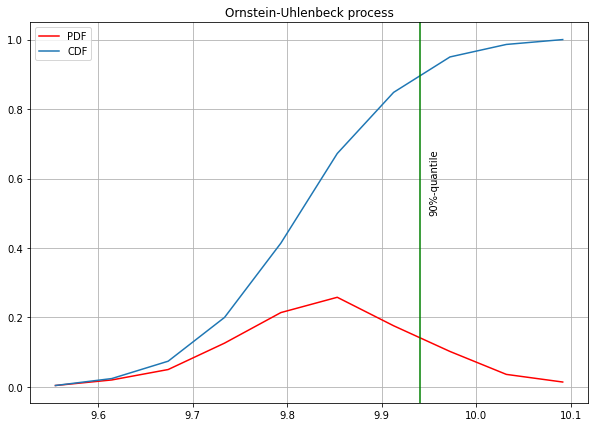

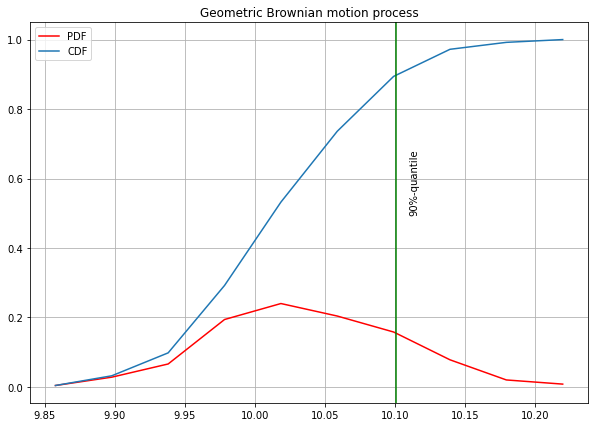

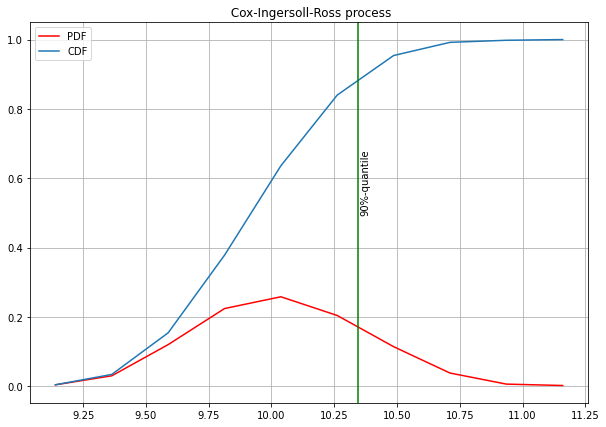

In [ ]:

import pandas as pd
%matplotlib inline

def generater_OU(n, t, x, theta):
  Ex = theta[0]/theta[1] + (x - theta[0]/theta[1]) * np.exp(-theta[1]*t)
  Vx = theta[2] ** 2 * np.sqrt((1-np.exp(-2*theta[1]*t))/(2*theta[1]))
  return np.random.normal (Ex, np.sqrt(Vx), n)

def generater_BS(n, dt, x, theta):
  lmean = np.log(x) + (theta[0]-0.5*theta[1]**2)*dt
  lsd = np.sqrt(dt)*theta[1]
  return np.random.lognormal(lmean, lsd, n)

def generater_CIR(n, dt, t, x, theta):
  c = 2*theta[1] /((1-np.exp(-theta[1]*t))* theta[2] ** 2)
  ncp = 2 * c * x * np.exp(-theta[2]*dt)
  df = 4 * theta[0]/theta[2]**2
  return np.random.noncentral_chisquare(df, ncp, n) /(2 * c)

def build_plot(data, name):
  count, bins_count = np.histogram(data, bins=10)
    
  pdf = count / sum(count)
    
  cdf = np.cumsum(pdf)
    
  plt.figure(figsize = (10, 7))
  plt.grid()
  plt.plot(bins_count[1:], pdf, color="red", label="PDF")
  plt.plot(bins_count[1:], cdf, label="CDF")
  q = np.percentile(data, 90) ###передавать название, посмотреть квантиль 
  plt.axvline(x= q, color='g')
  plt.text(q + 0.01, 0.5,'90%-quantile',rotation=90)
  plt.legend()
  plt.title(name)
  plt.show()

theta = [0.01, 0.02, 0.1]
N = 500
data = generater_OU(N, 1, 10, theta)
build_plot(data, "Ornstein-Uhlenbeck process")
  
data = generater_BS(N, 0.1, 10, theta)
build_plot(data, "Geometric Brownian motion process")
  
data = generater_CIR(N, 0.1, 1, 10, theta)
build_plot(data," Cox-Ingersoll-Ross process" )
  



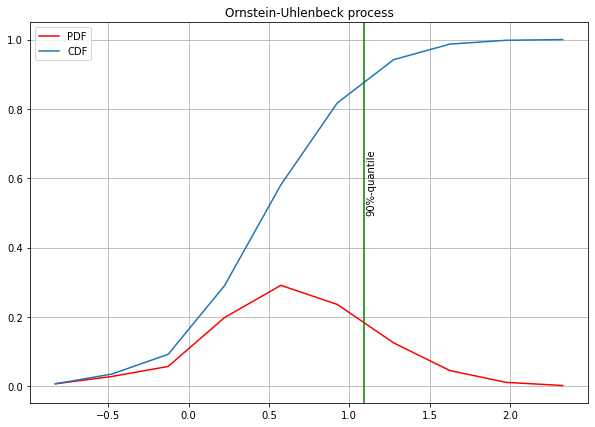

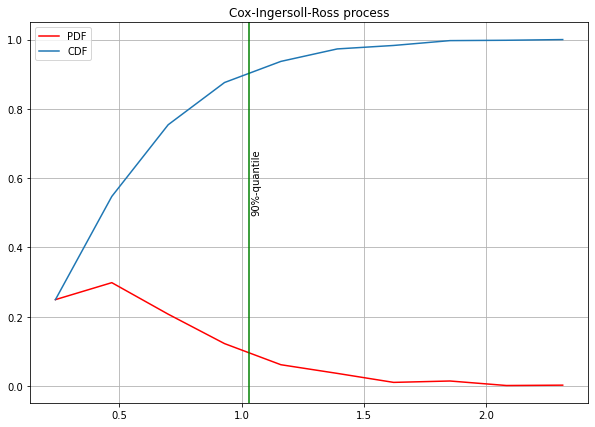

In [ ]:

import pandas as pd
%matplotlib inline

def generater_OU_stat(n, t, x, theta):
  Ex = theta[0]/theta[1]
  Vx = theta[2] ** 2 /(2*theta[1])
  return np.random.normal (Ex, np.sqrt(Vx), n)

def generater_CIR_stat(n, dt, t, x, theta):
    shape = 2 * theta[0] / theta[2] ** 2
    scale = theta[2] ** 2 / (2 * theta[1])
    return np.random.gamma(shape, scale, n)

def build_plot(data, name):
  count, bins_count = np.histogram(data, bins=10)
    
  pdf = count / sum(count)
    
  cdf = np.cumsum(pdf)
    
  plt.figure(figsize = (10, 7))
  plt.grid()
  plt.plot(bins_count[1:], pdf, color="red", label="PDF")
  plt.plot(bins_count[1:], cdf, label="CDF")
  q = np.percentile(data, 90) ###
  plt.axvline(x= q, color='g')
  plt.text(q + 0.01, 0.5,'90%-quantile',rotation=90)
  plt.legend()
  plt.title(name)
  plt.show()

theta = [0.01, 0.02, 0.1]
N = 1000
data = generater_OU_stat(N, 1, 10, theta)
build_plot(data, "Ornstein-Uhlenbeck process")
  
data = generater_CIR_stat(N, 0.1, 1, 10, theta)
build_plot(data, "Cox-Ingersoll-Ross process" )
  
